In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm

from scipy.stats import multivariate_normal as mvn

In [17]:
VIP_Test = pd.read_csv('VIP_Test.csv')
VIP_Train = pd.read_csv('VIP_Train.csv')

## EDA

## Training set

In [18]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0
...,...,...,...,...,...,...,...,...,...
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0
34998,7991148,28.171643,1,banktransfer,41.0,GG,M,First_Deposit,0


In [19]:
#check for NaN
checking_NaN = VIP_Train.isnull().values.any() 
checking_NaN

True

In [20]:
#locate rows where null values appear
NaN_rows = VIP_Train[VIP_Train.isnull().any(axis=1)]
NaN_rows

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
17,5677756,0.000000,0,dineromail,32.0,NaN,F,First_Deposit,0
71,5237723,67.121977,18,s_trustmarque,43.0,NaN,M,First_Deposit,0
103,4953917,0.000000,0,poli,36.0,TN,M,NaN,0
114,2440105,51.030622,1,ecopayz,NaN,FO,M,Sign Up,0
125,5484492,0.000000,0,clearchex,20.0,MZ,M,NaN,0
...,...,...,...,...,...,...,...,...,...
34900,7123938,0.000000,0,lateralpayments,30.0,MG,?,NaN,0
34943,5079126,79.554792,22,ppprepaidcard,30.0,NaN,F,First_Deposit,0
34947,5059554,34.929140,2,NaN,36.0,ET,M,Re-deposit,0
34958,3328480,0.000000,0,ewire,23.0,ZA,NaN,Sign Up,0


In [21]:
#locate columns where null values appear
NaN_columns = VIP_Train.isna().any()
NaN_columns

Player_Id              False
Deposit_Amount         False
Deposit_Quantity       False
Deposit_Method          True
Age                     True
Country                 True
Gender                  True
Dim_Alert_Type_Desc     True
VIP                    False
dtype: bool

In [22]:
#delete all rows that contain NaN values in any cell
VIP_Train.dropna(axis=0, how='any', subset=None, inplace=True)  

In [23]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0
...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0


In [24]:
#check to see that all rows containing NaN values have been dropped 
VIP_Train.isnull().values.any() 

False

In [25]:
#locate columns where '?' appear
NaN_columns = VIP_Train.eq('?').any()
NaN_columns

Player_Id              False
Deposit_Amount         False
Deposit_Quantity       False
Deposit_Method         False
Age                    False
Country                False
Gender                  True
Dim_Alert_Type_Desc     True
VIP                    False
dtype: bool

## Deal with the 'Deposit_Method' column

### Label encoding 'Deposit_Method' because there are 154 unique Deposit methods; too many to one hot encode

In [26]:
#create another category called 'Deposit_Method_encoded' which contains the encoded Deposit Methods. The coding of labels is done in alphabetical order
VIP_Train['Deposit_Method_encoded'] = VIP_Train['Deposit_Method'].astype('category').cat.codes    #The Deposit Methods in 'Deposit_Method' are coded from 0 to 153 in alphabetical order


## Deal with the 'Country' column

### Label encoding 'Country' because there are 195 unique countries; too many to one hot encode

In [27]:
#create another category called 'Country_encoded' which contains the encoded Countries. The coding of labels is done in alphabetical order
VIP_Train['Country_encoded'] = VIP_Train['Country'].astype('category').cat.codes    #The country labels in 'Country' are coded from 0 to 194 in alphabetical order

In [28]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91
...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181


## Deal with the 'Gender' column

### One hot encoding gender because there are only three categories: '?', 'M', 'F' and the categories are non-ordinal

In [29]:
Gender_encoded = pd.get_dummies(VIP_Train['Gender'], dtype=int, prefix = 'Gender_') #one hot encode the unique gender categories as a dataframe
VIP_Train = VIP_Train.join(Gender_encoded) #join the dataframe to the main dataframe

In [30]:
Gender_encoded

,Gender__?,Gender__F,Gender__M
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
34994,0,0,1
34995,0,0,1
34996,0,0,1
34997,0,1,0


In [31]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152,1,0,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186,0,1,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108,0,0,1
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141,0,0,1
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47,0,0,1
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104,0,0,1
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142,0,0,1
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181,0,1,0


## Deal with the 'Dim_Alert_Type_Desc' column

### One hot encoding Dim_Alert_Type_Desc because there are only six categories: 'Sign up', 'Special', 'First_Deposit', 'Re-deposit', '?', 'All Deposit' and the categories are non-ordinal

In [17]:
#how many unique countries are there
len(VIP_Train['Dim_Alert_Type_Desc'].unique())

6

In [18]:
VIP_Train['Dim_Alert_Type_Desc'].value_counts()

Sign Up          5634
Special          5619
First_Deposit    5562
Re-deposit       5507
?                5482
All Deposit      5462
Name: Dim_Alert_Type_Desc, dtype: int64

In [19]:
Dim_Alert_Type_Desc_encoded = pd.get_dummies(VIP_Train['Dim_Alert_Type_Desc'], prefix = 'Dim_Alert_Type_Desc_') #one hot encode the unique Dim_Alert_Type_Desc categories as a dataframe
VIP_Train = VIP_Train.join(Dim_Alert_Type_Desc_encoded) #join the dataframe to the main dataframe

In [20]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,v3_ebs,31.0,RO,?,All Deposit,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,instadebitviasc,30.0,VG,F,All Deposit,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,ifund-smooth-usd,21.0,LB,M,Special,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,diners,33.0,NZ,M,Sign Up,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,lateralpayments,55.0,IR,M,All Deposit,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,kalixa,39.0,CV,M,All Deposit,0,75,47,0,0,1,0,1,0,0,0,0
34995,1709649,0.000000,0,mastercardcredit,25.0,KW,M,All Deposit,0,86,104,0,0,1,0,1,0,0,0,0
34996,4947176,55.191792,3,ipay,32.0,OM,M,All Deposit,0,73,142,0,0,1,0,1,0,0,0,0
34997,4296112,52.488510,13,multibanco,53.0,UY,F,Special,0,98,181,0,1,0,0,0,0,0,0,1


In [21]:
VIP_Train.drop(['Deposit_Method'], axis=1, inplace=True)

In [22]:
VIP_Train.drop(['Country'], axis=1, inplace=True)

In [23]:
VIP_Train.drop(['Gender'], axis=1, inplace=True)

In [24]:
VIP_Train.drop(['Dim_Alert_Type_Desc'], axis=1, inplace=True)

In [25]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0
34995,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0
34996,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0
34997,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1


In [26]:
VIP_Train.reset_index(drop=True, inplace=True)

In [27]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0
33262,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0
33263,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0
33264,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1


# Final checks

In [28]:
#confirm that all rows where '?' appear have been encoded and or eliminated 
len(VIP_Train[VIP_Train.eq('?').any(axis=1)])  

0

In [29]:
#check for NaN
VIP_Train.isnull().values.any() 

False

In [30]:
# try turning the 'VIP' category from '0 and 1' to '1 and 2'
#VIP_Train['VIP'] += 1

In [31]:
VIP_Train

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0
33262,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0
33263,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0
33264,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1


In [32]:
VIP_Train.dtypes

Player_Id                               int64
Deposit_Amount                        float64
Deposit_Quantity                        int64
Age                                   float64
VIP                                     int64
Deposit_Method_encoded                  int16
Country_encoded                         int16
Gender__?                               uint8
Gender__F                               uint8
Gender__M                               uint8
Dim_Alert_Type_Desc__?                  uint8
Dim_Alert_Type_Desc__All Deposit        uint8
Dim_Alert_Type_Desc__First_Deposit      uint8
Dim_Alert_Type_Desc__Re-deposit         uint8
Dim_Alert_Type_Desc__Sign Up            uint8
Dim_Alert_Type_Desc__Special            uint8
dtype: object

In [33]:
X_training = VIP_Train[['Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender__?', 'Gender__F', 'Gender__M', 'Dim_Alert_Type_Desc__?', 'Dim_Alert_Type_Desc__All Deposit',
                        'Dim_Alert_Type_Desc__First_Deposit', 'Dim_Alert_Type_Desc__Re-deposit', 'Dim_Alert_Type_Desc__Sign Up', 
                        'Dim_Alert_Type_Desc__Special']].to_numpy()
#X_training = VIP_Train[['Player_Id']].to_numpy()
y_training = VIP_Train['VIP'].to_numpy()
y_training = np.array(y_training)

In [34]:
#X_training

In [35]:
#y_training

In [36]:
np.unique(y_training)

array([0, 1], dtype=int64)

In [37]:
print(X_training.shape)
print(y_training.shape)

(33266, 15)
(33266,)


## scikit-learn method logistic regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
from scipy.stats import norm

In [40]:
model = LogisticRegression(random_state=0).fit(X_training,y_training)

In [41]:
y_hat_training = model.predict(X_training)

In [42]:
probabilities = model.predict_proba(X_training)
probabilities

array([[0.94530604, 0.05469396],
       [0.67820989, 0.32179011],
       [0.89232966, 0.10767034],
       ...,
       [0.95131367, 0.04868633],
       [0.97190195, 0.02809805],
       [0.90377183, 0.09622817]])

In [43]:
#print number of rows and columns in probability estimates
len(model.predict_proba(X_training)), len(model.predict_proba(X_training)[0])

(33266, 2)

In [44]:
probabilities[:,0], probabilities[:,1]

(array([0.94530604, 0.67820989, 0.89232966, ..., 0.95131367, 0.97190195,
        0.90377183]),
 array([0.05469396, 0.32179011, 0.10767034, ..., 0.04868633, 0.02809805,
        0.09622817]))

Text(0, 0.5, 'is not VIP')

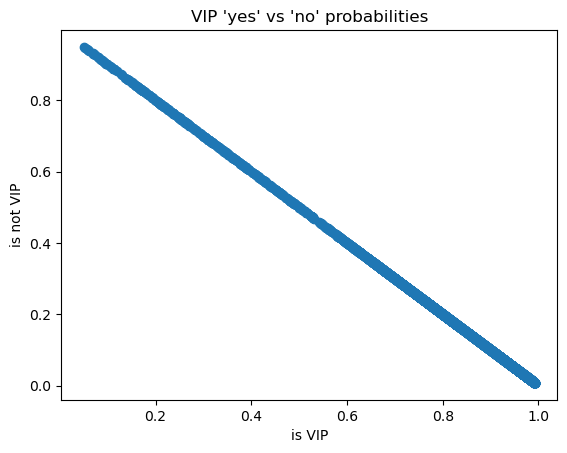

In [45]:
plt.figure()
plt.scatter(probabilities[:,0], probabilities[:,1])
plt.title("VIP 'yes' vs 'no' probabilities")
plt.xlabel('is VIP')
plt.ylabel('is not VIP')

In [46]:
probabilities_df = pd.DataFrame(probabilities, columns=['p(NOT_VIP)','p(VIP)'])

In [47]:
probabilities_df

,p(NOT_VIP),p(VIP)
0,0.945306,0.054694
1,0.678210,0.321790
2,0.892330,0.107670
3,0.916382,0.083618
4,0.948219,0.051781
...,...,...
33261,0.930800,0.069200
33262,0.894280,0.105720
33263,0.951314,0.048686
33264,0.971902,0.028098


In [48]:
#join target values and input features dataframes together using an inner join based on index
merged_df = pd.merge(VIP_Train, probabilities_df, left_index = True, right_index = True)

In [49]:
merged_df

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special,p(NOT_VIP),p(VIP)
0,613972,30.173168,5,31.0,0,135,152,1,0,0,0,1,0,0,0,0,0.945306,0.054694
1,1001159,4871.409870,1,30.0,0,69,186,0,1,0,0,1,0,0,0,0,0.678210,0.321790
2,2405146,37.812566,3,21.0,0,67,108,0,0,1,0,0,0,0,0,1,0.892330,0.107670
3,3694261,52.722560,15,33.0,0,27,141,0,0,1,0,0,0,0,1,0,0.916382,0.083618
4,7004960,42.776558,3,55.0,0,77,91,0,0,1,0,1,0,0,0,0,0.948219,0.051781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,8320542,57.606639,1,39.0,0,75,47,0,0,1,0,1,0,0,0,0,0.930800,0.069200
33262,1709649,0.000000,0,25.0,0,86,104,0,0,1,0,1,0,0,0,0,0.894280,0.105720
33263,4947176,55.191792,3,32.0,0,73,142,0,0,1,0,1,0,0,0,0,0.951314,0.048686
33264,4296112,52.488510,13,53.0,0,98,181,0,1,0,0,0,0,0,0,1,0.971902,0.028098


In [50]:
merged_df.sort_values(by=['p(VIP)'])

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special,p(NOT_VIP),p(VIP)
29688,9694809,0.000000,0,46.0,0,148,184,0,1,0,0,0,0,0,1,0,0.992434,0.007566
31060,9350215,0.000000,2,45.0,0,150,188,0,1,0,0,0,0,0,1,0,0.992414,0.007586
23038,9301825,59.416704,3,43.0,0,148,193,0,0,1,0,0,0,0,0,1,0.992391,0.007609
30539,9817572,39.453534,2,19.0,0,152,188,0,1,0,0,1,0,0,0,0,0.992355,0.007645
10004,9445354,59.978663,8,18.0,0,151,194,0,0,1,0,0,0,0,1,0,0.992229,0.007771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5119,1251909,9545.947560,2,50.0,0,11,65,0,0,1,0,0,0,0,1,0,0.058704,0.941296
14677,1966067,9997.517077,3,24.0,0,22,70,1,0,0,0,0,0,0,0,1,0.058128,0.941872
14887,2294695,8517.368262,3,46.0,1,0,12,0,0,1,0,1,0,0,0,0,0.056006,0.943994
7663,542915,9538.926278,1,47.0,1,82,10,0,0,1,0,0,0,1,0,0,0.052162,0.947838


In [51]:
#check the values from the VIP column from the training merged df
merged_df['VIP'].unique()

array([0, 1], dtype=int64)

In [52]:
# create a sub dataframe containing Player_Id's who have an above 99% probability of being VIP
merged_df_highest = merged_df[merged_df['p(VIP)'] > 0.85]

In [53]:
merged_df_highest

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender__?,Gender__F,Gender__M,Dim_Alert_Type_Desc__?,Dim_Alert_Type_Desc__All Deposit,Dim_Alert_Type_Desc__First_Deposit,Dim_Alert_Type_Desc__Re-deposit,Dim_Alert_Type_Desc__Sign Up,Dim_Alert_Type_Desc__Special,p(NOT_VIP),p(VIP)
458,502727,9867.591490,3,38.0,0,79,25,1,0,0,0,1,0,0,0,0,0.050248,0.949752
2169,3756620,9617.756930,14,37.0,0,18,56,0,1,0,0,0,0,0,1,0,0.079249,0.920751
2531,268866,8059.669419,2,20.0,0,12,51,0,0,1,0,0,0,0,0,1,0.071243,0.928757
3478,1508955,9636.770185,2,30.0,1,82,34,0,0,1,0,0,0,0,0,1,0.070107,0.929893
3546,3927461,9059.699670,2,29.0,0,27,37,1,0,0,0,1,0,0,0,0,0.086754,0.913246
4770,9104673,9286.017780,11,34.0,1,10,0,0,0,1,0,0,0,0,0,1,0.112300,0.887700
5119,1251909,9545.947560,2,50.0,0,11,65,0,0,1,0,0,0,0,1,0,0.058704,0.941296
6396,1223264,9588.362883,19,48.0,1,105,68,0,1,0,0,0,1,0,0,0,0.118559,0.881441
7663,542915,9538.926278,1,47.0,1,82,10,0,0,1,0,0,0,1,0,0,0.052162,0.947838
8709,4464937,7213.145181,2,33.0,1,15,17,0,1,0,0,0,0,1,0,0,0.142395,0.857605


In [54]:
# mean training accuracy between labels for training set
model.score(X_training, y_training)

0.9225034569831059

## Table of features, coefficients, p-values and z-scores from scikit-learn logistic regression

In [63]:
# function to calculate p-values from a logistic regression
def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    #print(n)
    #print(model.coef_[0])
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i,0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t = coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return p

model coefficients:

In [64]:
coefficients = pd.DataFrame(['intercept','Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender__?', 'Gender__F', 'Gender__M', 'Dim_Alert_Type_Desc__?', 'Dim_Alert_Type_Desc__All Deposit',
                        'Dim_Alert_Type_Desc__First_Deposit', 'Dim_Alert_Type_Desc__Re-deposit', 'Dim_Alert_Type_Desc__Sign Up', 
                        'Dim_Alert_Type_Desc__Special'], columns=['features'])
coefficient = np.concatenate((model.intercept_, model.coef_[0]))
coefficients['coefficients'] = pd.DataFrame(coefficient, columns=['coefficients'])

p-value calculations

In [65]:
#p-values for intercept and all 8 features
pvalues = logit_pvalue(model, X_training)
features = ['intercept','Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender__?', 'Gender__F', 'Gender__M', 'Dim_Alert_Type_Desc__?', 'Dim_Alert_Type_Desc__All Deposit',
                        'Dim_Alert_Type_Desc__First_Deposit', 'Dim_Alert_Type_Desc__Re-deposit', 'Dim_Alert_Type_Desc__Sign Up', 
                        'Dim_Alert_Type_Desc__Special']
pvalue_table = zip(features, pvalues)
pvalue_table_dict = dict(pvalue_table) 
p_values = pd.DataFrame.from_dict(pvalue_table_dict, orient='index', columns=['p-value'])
p_values['features'] = p_values.index

C:\Users\User\AppData\Local\Temp\ipykernel_23000\695031324.py:20: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diag(vcov))


z-score (predictor coefficient value/standard error of coefficient)

In [66]:
#z-scores for intercept and all 8 features
from scipy import stats
z_scores = pd.DataFrame(['intercept','Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded',
                        'Gender__?', 'Gender__F', 'Gender__M', 'Dim_Alert_Type_Desc__?', 'Dim_Alert_Type_Desc__All Deposit',
                        'Dim_Alert_Type_Desc__First_Deposit', 'Dim_Alert_Type_Desc__Re-deposit', 'Dim_Alert_Type_Desc__Sign Up', 
                        'Dim_Alert_Type_Desc__Special'], columns=['features'])
z_score = np.concatenate((stats.zscore(model.intercept_), stats.zscore(model.coef_[0])))
z_scores['z_score'] = pd.DataFrame(z_score, columns=['coefficients'])

In [67]:
table = coefficients.merge(p_values, how = 'inner', on = ['features'])
table = table.merge(z_scores, how = 'inner', on = ['features'])
table

,features,coefficients,p-value,z_score
0,intercept,-1.067983e-04,NaN,NaN
1,Player_Id,-1.688805e-07,0.000000,0.467939
2,Deposit_Amount,4.099095e-04,0.000000,0.597709
3,Deposit_Quantity,-7.094484e-04,0.740470,0.243486
4,Age,-3.327325e-03,0.131752,-0.584947
5,Deposit_Method_encoded,-8.026316e-03,0.000000,-2.071953
6,Country_encoded,-1.031613e-02,0.000000,-2.796570
7,Gender__?,-1.163603e-05,NaN,0.464310
8,Gender__F,-4.738914e-05,NaN,0.452996
9,Gender__M,-4.777317e-05,NaN,0.452874


## Confusion matrix

In [112]:
from sklearn.metrics import confusion_matrix

In [113]:
tn, fp, fn, tp = confusion_matrix(y_training, y_hat_training).ravel()
tn, fp, fn, tp

(30515, 161, 2417, 173)

In [114]:
confusion_mat = pd.DataFrame({'positive': [tp,fp],'negative': [tn,fn]})
confusion_mat.rename(index={0: "True", 1:"False"}, inplace=True)

In [115]:
confusion_mat

,positive,negative
True,173,30515
False,161,2417


## Training set plots

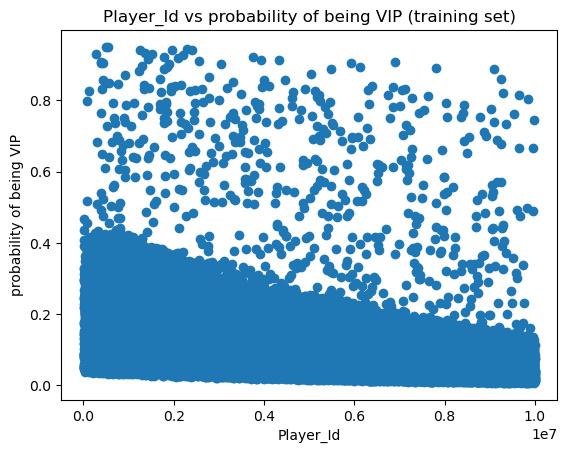

In [116]:
# Player_Id vs probability of being VIP
plt.figure()
plt.scatter(merged_df['Player_Id'],merged_df['p(VIP)'])
plt.title('Player_Id vs probability of being VIP (training set)')
plt.xlabel('Player_Id')
plt.ylabel('probability of being VIP')
plt.show()

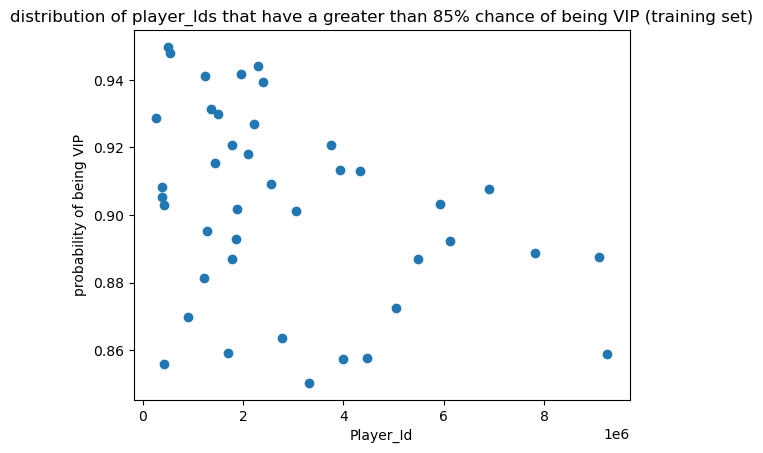

In [118]:
#plot to show distribution of Player_Id's that have a greater than 99% chance of being VIP
plt.figure()
plt.scatter(merged_df_highest['Player_Id'],merged_df_highest['p(VIP)'])
plt.title('distribution of player_Ids that have a greater than 85% chance of being VIP (training set)')
plt.xlabel('Player_Id')
plt.ylabel('probability of being VIP')
plt.show()

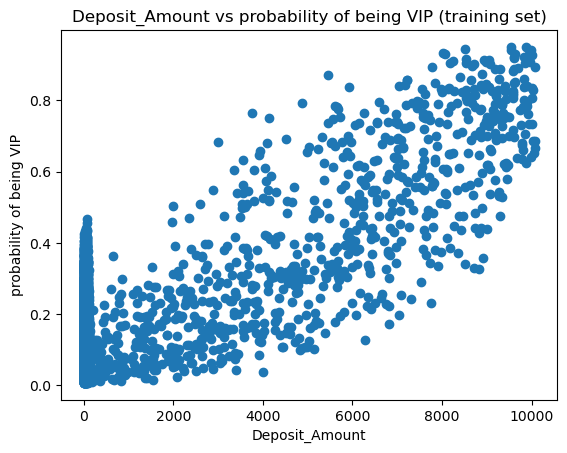

In [119]:
# Deposit_Amount vs probability of being VIP
plt.figure()
plt.scatter(merged_df['Deposit_Amount'],merged_df['p(VIP)'])
plt.title('Deposit_Amount vs probability of being VIP (training set)')
plt.xlabel('Deposit_Amount')
plt.ylabel('probability of being VIP')
plt.show()

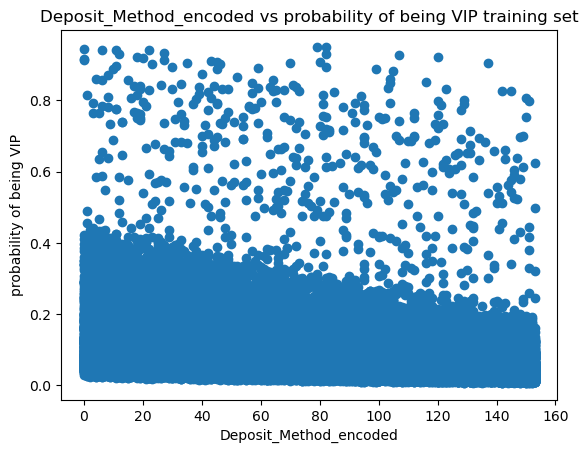

In [120]:
# Deposit_Method_encoded vs probability of being VIP
plt.figure()
plt.scatter(merged_df['Deposit_Method_encoded'],merged_df['p(VIP)'])
plt.title('Deposit_Method_encoded vs probability of being VIP training set')
plt.xlabel('Deposit_Method_encoded')
plt.ylabel('probability of being VIP')
plt.show()

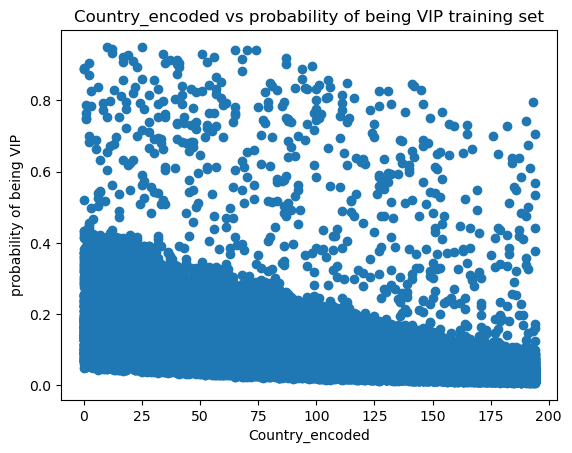

In [121]:
# Country_encoded vs probability of being VIP
plt.figure()
plt.scatter(merged_df['Country_encoded'],merged_df['p(VIP)'])
plt.title('Country_encoded vs probability of being VIP training set')
plt.xlabel('Country_encoded')
plt.ylabel('probability of being VIP')
plt.show()

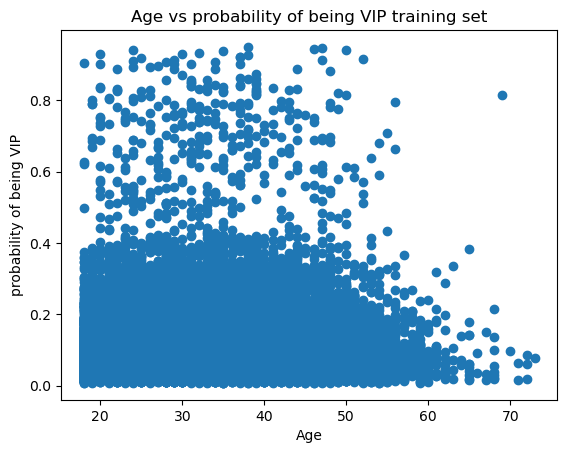

In [122]:
# Deposit_Method_encoded vs probability of being VIP
plt.figure()
plt.scatter(merged_df['Age'],merged_df['p(VIP)'])
plt.title('Age vs probability of being VIP training set')
plt.xlabel('Age')
plt.ylabel('probability of being VIP')
plt.show()

## Test set

In [79]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,5890355,44.313120,20,debitcard,31.0,GP,M,First_Deposit,0.0
1,940061,56.223226,1,servipag,52.0,KM,?,Special,0.0
2,8549083,28.329851,13,visadebit,42.0,LK,F,?,0.0
3,7447056,0.000000,0,lateralpayments,33.0,IR,M,Special,0.0
4,7047755,0.000000,0,payr,29.0,MY,M,Special,0.0
...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,usemybank,26.0,BI,M,All Deposit,0.0
14996,8247479,50.446116,1,ukash,25.0,IE,?,Sign Up,0.0
14997,9836345,30.707844,13,paysafecard,29.0,IT,M,?,0.0
14998,5836061,44.164896,15,sc-gvccashier,29.0,ZM,M,?,0.0


In [80]:
#check to see if there are any null values
VIP_Test.isnull().values.any()

True

In [81]:
#locate rows where null values appear
NaN_rows_test = VIP_Test[VIP_Test.isnull().any(axis=1)]
NaN_rows_test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
71,4347060,74.172227,4,firepay,22.0,RS,M,NaN,0.0
78,2022078,0.000000,1,visadebit,28.0,NaN,F,Re-deposit,0.0
84,9073880,39.200680,1,NaN,26.0,ID,M,Special,0.0
121,9568537,32.911299,1,NaN,35.0,JP,M,Sign Up,0.0
143,1242919,25.776504,3,neteller_neteller,NaN,BZ,M,Special,0.0
...,...,...,...,...,...,...,...,...,...
14830,3058536,0.000000,1,NaN,55.0,TM,F,Re-deposit,0.0
14890,2814770,68.402119,4,hipay,26.0,PE,NaN,?,0.0
14899,3517329,39.660122,4,v13_ebs,34.0,VC,M,NaN,0.0
14935,6300957,47.711400,3,muchbetter,29.0,BZ,NaN,Special,0.0


In [82]:
#delete all rows that contain NaN values in any cell
VIP_Test.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)  

In [83]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP
0,5890355,44.313120,20,debitcard,31.0,GP,M,First_Deposit,0.0
1,940061,56.223226,1,servipag,52.0,KM,?,Special,0.0
2,8549083,28.329851,13,visadebit,42.0,LK,F,?,0.0
3,7447056,0.000000,0,lateralpayments,33.0,IR,M,Special,0.0
4,7047755,0.000000,0,payr,29.0,MY,M,Special,0.0
...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,usemybank,26.0,BI,M,All Deposit,0.0
14996,8247479,50.446116,1,ukash,25.0,IE,?,Sign Up,0.0
14997,9836345,30.707844,13,paysafecard,29.0,IT,M,?,0.0
14998,5836061,44.164896,15,sc-gvccashier,29.0,ZM,M,?,0.0


In [84]:
#print the rows where '?' appear in the test set
print_None_rows_test = VIP_Test[VIP_Test.eq('?').any(axis=1)]  
print_None_rows_test.shape

(3475, 9)

In [85]:
#create another category called 'Deposit_Method_encoded' which contains the encoded Deposit Methods. The coding of labels is done in alphabetical order
VIP_Test['Deposit_Method_encoded'] = VIP_Test['Deposit_Method'].astype('category').cat.codes    #The Deposit Methods in 'Deposit_Method' are coded from 0 to 153 in alphabetical order

#create another category called 'Country_encoded' which contains the encoded Countries. The coding of labels is done in alphabetical order
VIP_Test['Country_encoded'] = VIP_Test['Country'].astype('category').cat.codes    #The country labels in 'Country' are coded from 0 to 194 in alphabetical order

#create another category called 'Gender_encoded' which contains the encoded Genders. The coding of labels is done in alphabetical order
VIP_Test['Gender_encoded'] = VIP_Test['Gender'].astype('category').cat.codes    #The gender labels in 'Gender' are coded from 0 to 2 in alphabetical order

#create another category called 'Dim_Alert_Type_Desc_encoded' which contains the encoded Dim_Alert_Type_Desc. The coding of labels is done in alphabetical order
VIP_Test['Dim_Alert_Type_Desc_encoded'] = VIP_Test['Dim_Alert_Type_Desc'].astype('category').cat.codes    #The labels in 'Dim_Alert_Type_Desc' are coded from 0 to 5 in alphabetical order


In [86]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Deposit_Method,Age,Country,Gender,Dim_Alert_Type_Desc,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Dim_Alert_Type_Desc_encoded
0,5890355,44.313120,20,debitcard,31.0,GP,M,First_Deposit,0.0,24,76,2,2
1,940061,56.223226,1,servipag,52.0,KM,?,Special,0.0,127,101,0,5
2,8549083,28.329851,13,visadebit,42.0,LK,F,?,0.0,142,110,1,0
3,7447056,0.000000,0,lateralpayments,33.0,IR,M,Special,0.0,77,91,2,5
4,7047755,0.000000,0,payr,29.0,MY,M,Special,0.0,110,132,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,usemybank,26.0,BI,M,All Deposit,0.0,133,25,2,1
14996,8247479,50.446116,1,ukash,25.0,IE,?,Sign Up,0.0,132,86,0,4
14997,9836345,30.707844,13,paysafecard,29.0,IT,M,?,0.0,111,93,2,0
14998,5836061,44.164896,15,sc-gvccashier,29.0,ZM,M,?,0.0,124,192,2,0


In [87]:
VIP_Test.drop(['Deposit_Method'], axis=1, inplace=True)
VIP_Test.drop(['Country'], axis=1, inplace=True)
VIP_Test.drop(['Gender'], axis=1, inplace=True)
VIP_Test.drop(['Dim_Alert_Type_Desc'], axis=1, inplace=True)

In [88]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Dim_Alert_Type_Desc_encoded
0,5890355,44.313120,20,31.0,0.0,24,76,2,2
1,940061,56.223226,1,52.0,0.0,127,101,0,5
2,8549083,28.329851,13,42.0,0.0,142,110,1,0
3,7447056,0.000000,0,33.0,0.0,77,91,2,5
4,7047755,0.000000,0,29.0,0.0,110,132,2,5
...,...,...,...,...,...,...,...,...,...
14995,5873730,57.414164,1,26.0,0.0,133,25,2,1
14996,8247479,50.446116,1,25.0,0.0,132,86,0,4
14997,9836345,30.707844,13,29.0,0.0,111,93,2,0
14998,5836061,44.164896,15,29.0,0.0,124,192,2,0


In [89]:
VIP_Test.reset_index(drop=True, inplace=True)

In [90]:
VIP_Test

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Dim_Alert_Type_Desc_encoded
0,5890355,44.313120,20,31.0,0.0,24,76,2,2
1,940061,56.223226,1,52.0,0.0,127,101,0,5
2,8549083,28.329851,13,42.0,0.0,142,110,1,0
3,7447056,0.000000,0,33.0,0.0,77,91,2,5
4,7047755,0.000000,0,29.0,0.0,110,132,2,5
...,...,...,...,...,...,...,...,...,...
14257,5873730,57.414164,1,26.0,0.0,133,25,2,1
14258,8247479,50.446116,1,25.0,0.0,132,86,0,4
14259,9836345,30.707844,13,29.0,0.0,111,93,2,0
14260,5836061,44.164896,15,29.0,0.0,124,192,2,0


In [91]:
#check the values from the VIP column from the dataframe
VIP_Test['VIP'].unique()

array([0.])

In [92]:
X_test = VIP_Test[['Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded','Gender_encoded','Dim_Alert_Type_Desc_encoded']].to_numpy()
y_test = VIP_Test['VIP'].to_numpy()
y_test = np.array(y_test)

In [93]:
X_test.shape, y_test.shape

((14262, 8), (14262,))

In [94]:
# prediction using scikit-learn 
y_hat_test = model.predict(X_test)

In [95]:
probabilities_test = model.predict_proba(X_test)
probabilities_test

array([[0.88803012, 0.11196988],
       [0.91464463, 0.08535537],
       [0.97925933, 0.02074067],
       ...,
       [0.97350016, 0.02649984],
       [0.98287525, 0.01712475],
       [0.9446065 , 0.0553935 ]])

In [96]:
probabilities_test_df = pd.DataFrame(probabilities_test, columns=['p(VIP)','p(NOT_VIP)'])

In [97]:
probabilities_test_df

,p(VIP),p(NOT_VIP)
0,0.888030,0.111970
1,0.914645,0.085355
2,0.979259,0.020741
3,0.949068,0.050932
4,0.971585,0.028415
...,...,...
14257,0.915361,0.084639
14258,0.967791,0.032209
14259,0.973500,0.026500
14260,0.982875,0.017125


In [98]:
#join target values and input features dataframes together using an inner join based on index
merged_test_df = pd.merge(VIP_Test, probabilities_test_df, left_index = True, right_index = True)

In [99]:
merged_test_df

,Player_Id,Deposit_Amount,Deposit_Quantity,Age,VIP,Deposit_Method_encoded,Country_encoded,Gender_encoded,Dim_Alert_Type_Desc_encoded,p(VIP),p(NOT_VIP)
0,5890355,44.313120,20,31.0,0.0,24,76,2,2,0.888030,0.111970
1,940061,56.223226,1,52.0,0.0,127,101,0,5,0.914645,0.085355
2,8549083,28.329851,13,42.0,0.0,142,110,1,0,0.979259,0.020741
3,7447056,0.000000,0,33.0,0.0,77,91,2,5,0.949068,0.050932
4,7047755,0.000000,0,29.0,0.0,110,132,2,5,0.971585,0.028415
...,...,...,...,...,...,...,...,...,...,...,...
14257,5873730,57.414164,1,26.0,0.0,133,25,2,1,0.915361,0.084639
14258,8247479,50.446116,1,25.0,0.0,132,86,0,4,0.967791,0.032209
14259,9836345,30.707844,13,29.0,0.0,111,93,2,0,0.973500,0.026500
14260,5836061,44.164896,15,29.0,0.0,124,192,2,0,0.982875,0.017125


In [100]:
#check the values from the VIP column from the test merged df
merged_test_df['VIP'].unique()

array([0.])

In [101]:
# create a sub dataframe containing Player_Id's who have an above 99% probability of being VIP
merged_test_df_highest = merged_test_df[merged_test_df['p(VIP)'] > 0.99]

In [102]:
merged_test_df_highest.shape

(39, 11)

In [103]:
# mean accuracy between labels for test set
model.score(X_test,y_test)

0.9894825410180901

In [104]:
#test set features p-values
pvalues = logit_pvalue(model, X_test)

features = ['intercept','Player_Id','Deposit_Amount','Deposit_Quantity','Age','Deposit_Method_encoded','Country_encoded','Gender_encoded','Dim_Alert_Type_Desc_encoded']

pvalue_table = zip(features, pvalues)
    
pvalue_table_dict = dict(pvalue_table) 

p_values = pd.DataFrame.from_dict(pvalue_table_dict, orient='index', columns=['p-value'])
p_values

,p-value
intercept,0.999471
Player_Id,0.000000
Deposit_Amount,0.000000
Deposit_Quantity,0.829607
Age,0.324744
Deposit_Method_encoded,0.000000
Country_encoded,0.000000
Gender_encoded,0.997458
Dim_Alert_Type_Desc_encoded,0.987937


## Confusion matrix on test set

In [105]:
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
(tn, fp, fn, tp)

(14112, 150, 0, 0)

In [106]:
confusion_mat_test = pd.DataFrame({'positive': [tp,fp],'negative': [tn,fn]})
confusion_mat_test.rename(index={0: "True", 1:"False"}, inplace=True)

In [107]:
confusion_mat_test

,positive,negative
True,0,14112
False,150,0


## Test set plots

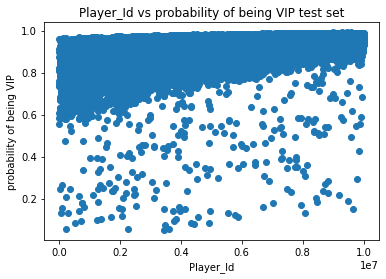

In [108]:
plt.figure()
plt.scatter(merged_test_df['Player_Id'],merged_test_df['p(VIP)'])
plt.title('Player_Id vs probability of being VIP test set')
plt.xlabel('Player_Id')
plt.ylabel('probability of being VIP')
plt.show()

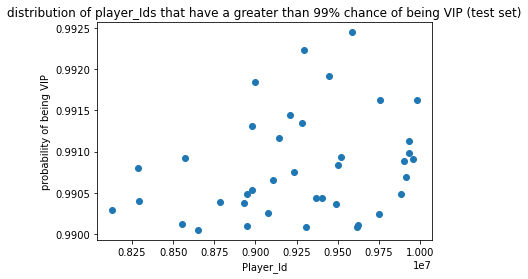

In [109]:
#plot to show distribution of Player_Id's that have a greater than 99% chance of being VIP
plt.figure()
plt.scatter(merged_test_df_highest['Player_Id'],merged_test_df_highest['p(VIP)'])
plt.title('distribution of player_Ids that have a greater than 99% chance of being VIP (test set)')
plt.xlabel('Player_Id')
plt.ylabel('probability of being VIP')
plt.show()

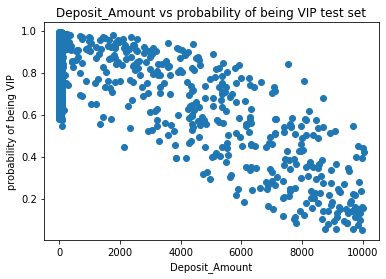

In [110]:
plt.figure()
plt.scatter(merged_test_df['Deposit_Amount'],merged_test_df['p(VIP)'])
plt.title('Deposit_Amount vs probability of being VIP test set')
plt.xlabel('Deposit_Amount')
plt.ylabel('probability of being VIP')
plt.show()

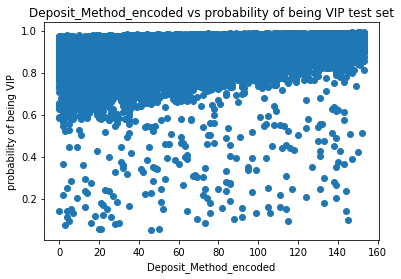

In [111]:
plt.figure()
plt.scatter(merged_test_df['Deposit_Method_encoded'],merged_test_df['p(VIP)'])
plt.title('Deposit_Method_encoded vs probability of being VIP test set')
plt.xlabel('Deposit_Method_encoded')
plt.ylabel('probability of being VIP')
plt.show()

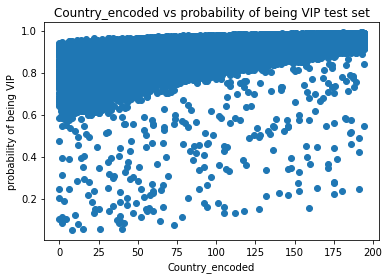

In [112]:
plt.figure()
plt.scatter(merged_test_df['Country_encoded'],merged_test_df['p(VIP)'])
plt.title('Country_encoded vs probability of being VIP test set')
plt.xlabel('Country_encoded')
plt.ylabel('probability of being VIP')
plt.show()

## Running the models with just 4 statistically significant predictor variables: 'Player_Id', 'Deposit_Amount', 'Deposit_Method_encoded', 'Country_encoded'

## Training with a reduced number of predictors

In [113]:
X_training = VIP_Train[['Player_Id','Deposit_Amount','Deposit_Method_encoded','Country_encoded']].to_numpy()
y_training = VIP_Train['VIP'].to_numpy()
y_training = np.array(y_training)

In [114]:
model_2 = LogisticRegression(random_state=0).fit(X_training,y_training)

In [115]:
model_2.predict(X_training)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
probabilities = model_2.predict_proba(X_training)
probabilities

array([[0.94369517, 0.05630483],
       [0.67401929, 0.32598071],
       [0.89266534, 0.10733466],
       ...,
       [0.95188934, 0.04811066],
       [0.97026757, 0.02973243],
       [0.90322243, 0.09677757]])

In [117]:
# mean accuracy between labels for training set
model_2.score(X_training, y_training)

0.9224433355377863